# Trabajo Práctico N°4

## Pablo Toledo Margalef

* Segmentación

## Ejercicio 1

Realice un análisis comparativo entre las técnicas de segmentación y representación explicadas en las clases teóricas y las existentes en el software.

## Ejercicio 2

Explique y compare los enfoques de segmentación basadas en detección de discontinuidades y las basadas en análisis de similaridad. Menciones ejemplos de cada una.

Los enfoques de segmentación basados en detección de discontinuidades se basan aprovechar los cambios abruptos en la imagen. A través de convolusionar la imagen para detectar estos cambios abruptos o de aplicar algún filtro frecuencial que lo detecte. También es posible utilizar una técnica como shift and difference para detectar bordes, aunque su relación costo beneficio es cuestionable.

En cambio, los enfoques que buscan similaridades se basan en identificar regiones que comparten una propiedad, generalmente representada a través de un predicado lógico. Entre estas se pueden mencionar las técnicas de umbralamiento, donde el valor umbral es calculado a través de obtener un valor óptimo o de buscar el valor con el menor error. Otra alternativa es la de crecimiento de regiones, que se basa en "inundar" regiones que cumplan con una condición, el otro enfoque es particionar regiones con propiedades similares y agruparlas, luego particionar nuevamente bajo esas condiciones y así hasta delimitar las regiones deseadas.

## Ejercicio 3

Explique y compare las técnicas de partición de regiones “crecimiento de regiones” y “separación y mezclado” (splitting and merging).

### Crecimiento de Regiones

El crecimiento de regiones se basa en plantar una "semilla" que sirve de punto inicial para comenzar el crecimiento. Y luego iterar expandiendo la región a píxeles que cumplan con cierto predicado.

### Splitting and Merge

Consiste en particionar la imagen en regiones disjuntas y luego en fusionar aquellas regiones que cumplen un predicado en conjunto y subparticionar aquellas regiones que no lo cumplen.

## Ejercicio 4

Defina la Transformada de Hough para rectas. Indique el plano de transformación. ¿Por qué se suele utilizar la ecuación normal de la recta $\rho = x \cdot cos(\theta) + y \cdot sin(\theta)$? ¿Qué ventajas presenta su utilización?

La transformada de Hough para rectas consiste en transformar el espacio de coordenadas de:

$y=m\cdot x+b$

a un espacio que permita escribir las rectas como:

$b=x\cdot m + y$

Lo que permite reescribir una recto en términos de $(m,b)$ en lugar de estar escrita en términos de $(x,y)$.

Una opción es utilizar la ecuación normal de la recta $\rho = x \cdot cos(\theta) + y \cdot sin(\theta)$ para los problemas de tener rectas con pendiente infinita.

## Ejercicio 5

Conteste justificando

1. ¿Los descriptores de Fourier son invariantes a la rotación y al punto de inicio pero no alescalamiento?

Verdadero, el hecho de trasladar o de comenzar en otro punto no cambian al objeto en sí. En cambio escalarlo lo modifica sustancialmente.
    
2. ¿La transformada de Hough puede utilizarse directamente para detectar curvas parametrizables en imágenes inmersas en ruido? ¿Puede usarse cuando existen superposiciones o discontinuidades?

Sí. Ya que la transformada es lo suficientemente poderosa para pasar por alto el ruido y las discontinuidades y detectar la recta.

3. ¿Pueden obtenerse representaciones invariantes a la rotación y al origen a partir del código cadena?

Sí, ya que el código cadena computa los "pasos" para representar un blob dentro de la imágen a partir de un punto de comienzo. El hecho de cambiar el origen es comenzar a leer el código desde otro lugar y después "wrappear" la lectura. Y trasladar es sumar coordenadas a dicho punto de origen.

## Ejercicio 6

Realizar los programas que se describen a continuación que permiten aplicar distintos criterios de segmentación/representación (puede hacer uso de funciones propias programadas en guías anteriores):
1. Un programa que realice la convolución de una imagen máscara pasa-altos que sea una aproximación de la derivada primera y luego aplique un umbralamiento sobre el valor absoluto de los píxeles a partir del cual, aquellos que lo superen son considerados bordes.
1. Un programa que realice la convolución de una imagen con una máscara que sea una aproximación de la derivada segunda (Laplaciano) y luego considere borde a aquellos píxeles que representan un cruce por cero (que alguno de sus vecinos no es cero y el píxel lo es, o el pixel es de valor positivo y algún vecino negativo o cero o viceversa).
1. El algoritmo de detección de líneas Shift and Difference.
1. La Transformada de Hough para la detección de líneas con direcciones: $-45º$, $0º$,$45º$ y $90º$. La salida del programa debe ser la matriz acumuladora.

## Ejercicio 7

Ejercicio integrador. A partir de la imagen “Ejercicio Integrador.bmp”, desarrollar un algoritmo aplicando todo lo estudiado hasta el momento que permita:
1. Filtrar el ruido obteniendo la “Imagen deseada A” mostrada debajo;
1. Segmentar e identificar cada objeto presente, obteniendo un resultado como el mostrado en la “Imagen deseada B” (sugerencia: analice la función bwlabel de MatLab® y la función jet);
1. Contar los objetos detectados y hallar el área en píxeles del objeto mayor y el promedio de los más pequeños;
1. Generar una imagen binaria (blanco y negro) que contenga sólo los objetos de menor tamaño (eliminando el objeto de tamaño mayor).
1. Guardar las imágenes resultantes de 1, 2 y 4 adecuadamente en el disco rígido.

Fundamente cada paso realizado y los parámetros usados. Implemente la solución en un único script de MatLab® y llame en él a las funciones que sean necesarias.

![Objetivo Ejercicio 7](ej7.png)

In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im_ejercicio = imageio.imread('data/ejercicio_integrador.bmp')

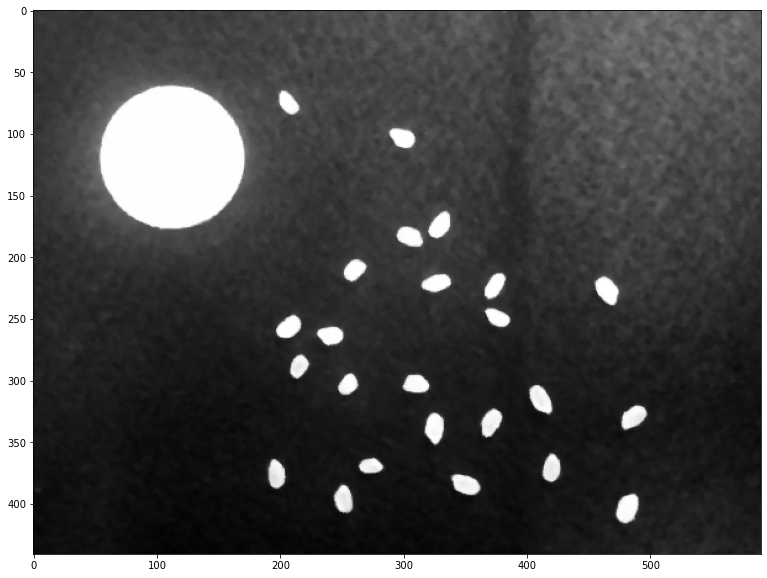

In [3]:
from tp3 import median_filter

integrador_1 = median_filter(im_ejercicio,order=2)

fig, ax = plt.subplots(figsize=(15,10))

ax.imshow(integrador_1, cmap='gray')

plt.show()

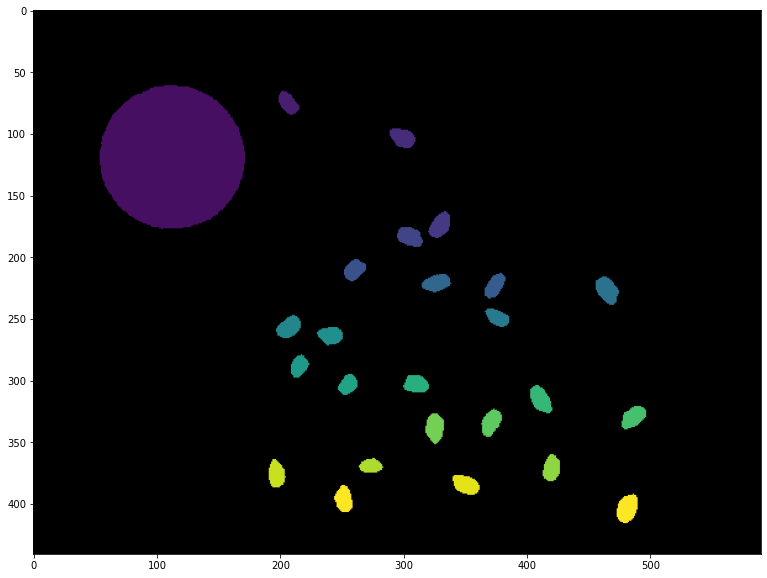

In [4]:
from tp1 import threshold
from scipy.ndimage import label
from matplotlib import cm

thresh_im = threshold(integrador_1, thresh=.65)
label, num_features = label(thresh_im)

colors  = cm.get_cmap('viridis', num_features)

h,w = thresh_im.shape

integrador_2 = np.zeros((h,w,3))

for i in range(h):
    for j in range(w):
        v = label[i,j]
        if v != 0:
            integrador_2[i,j] = colors(v)[:3]
            
fig, ax = plt.subplots(figsize=(15,10))

ax.imshow(integrador_2)

plt.show()

In [5]:
print(f'Cantidad de objetos detectados: {num_features}')

Cantidad de objetos detectados: 25


In [6]:
from collections import Counter

non_zero_labels = filter(lambda x: x!=0, label.flat)
counter = Counter()
counter.update(non_zero_labels)

In [7]:
region, area = counter.most_common(1).pop()

In [8]:
print(f'La región más grande es la {region} con un área de {area} píxeles')

La región más grande es la 1 con un área de 10740 píxeles


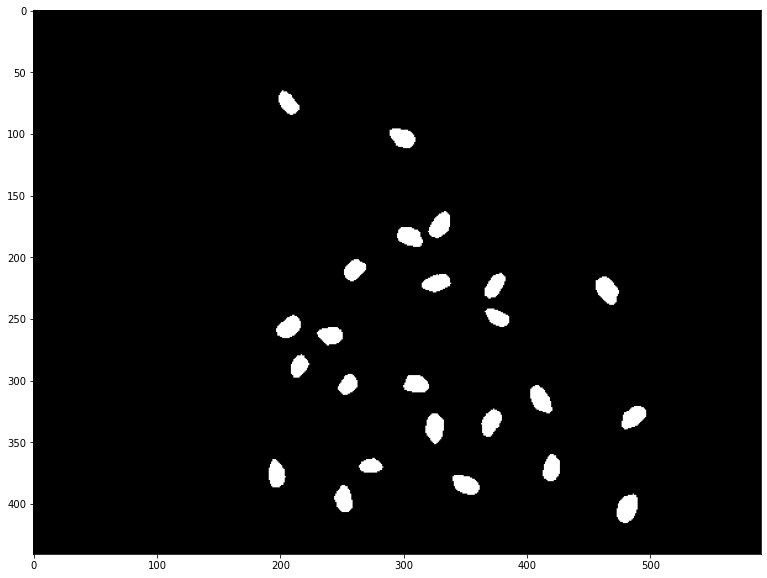

In [10]:
integrador_4 = label.copy()

integrador_4[integrador_4 == 1] = 0

integrador_4 = integrador_4.clip(0,1)

           
fig, ax = plt.subplots(figsize=(15,10))

ax.imshow(integrador_4, cmap='gray')

plt.show()

In [11]:
imageio.imwrite('data/integrador_1.png',integrador_1.astype(np.uint8))

In [17]:
imageio.imwrite('data/integrador_2.png',(integrador_2 * 255).astype(np.uint8))

In [14]:
imageio.imwrite('data/integrador_4.png',(integrador_4 * 255).astype(np.uint8))